**Data building and pre processing**

In [ ]:
words=["account","accountnumber","confirm","details","mailbox","clickhere","payment","credit","creditdetails","bankbalance","password","username",
       "won","recently","identity","luckydraw","shortlisted","credited","blocked","risk","profile","re-login","congratulations","amount","loan","bankname",
       "ifsccode","locked","temporarily","renewal","suspended","click","urgent","confidental","access","suspicious","activity","expired","money"
      ,"otp","invest","earn","more","credentials","offers","card","recover","selected","paypal","easy","terms","lottery","prosperous","hurry-up","verify"
      ,"inconvenience","complication","avoid","pay","prize","vouchers","claim","free","cash","reply","congrats","awarded","rs","text","msg","stop","selected","urgent","cash","call","cash"
      ,"phone","noxia","motorola","sony","txt","pounds","dollars","vodafone","transaction","euro","donate","job","deal","bonus","Phishing"]

In [ ]:
len(words)

91

In [ ]:
finalwords=[]
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
for i in words:
  finalwords.append(stemmer.stem(i))
finalwords

['account',
 'accountnumb',
 'confirm',
 'detail',
 'mailbox',
 'clickher',
 'payment',
 'credit',
 'creditdetail',
 'bankbal',
 'password',
 'usernam',
 'won',
 'recent',
 'ident',
 'luckydraw',
 'shortlist',
 'credit',
 'block',
 'risk',
 'profil',
 're-login',
 'congratul',
 'amount',
 'loan',
 'banknam',
 'ifsccod',
 'lock',
 'temporarili',
 'renew',
 'suspend',
 'click',
 'urgent',
 'confident',
 'access',
 'suspici',
 'activ',
 'expir',
 'money',
 'otp',
 'invest',
 'earn',
 'more',
 'credenti',
 'offer',
 'card',
 'recov',
 'select',
 'paypal',
 'easi',
 'term',
 'lotteri',
 'prosper',
 'hurry-up',
 'verifi',
 'inconveni',
 'complic',
 'avoid',
 'pay',
 'prize',
 'voucher',
 'claim',
 'free',
 'cash',
 'repli',
 'congrat',
 'award',
 'rs',
 'text',
 'msg',
 'stop',
 'select',
 'urgent',
 'cash',
 'call',
 'cash',
 'phone',
 'noxia',
 'motorola',
 'soni',
 'txt',
 'pound',
 'dollar',
 'vodafon',
 'transact',
 'euro',
 'donat',
 'job',
 'deal',
 'bonu',
 'phish']

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving UppdatedDataset.xlsx to UppdatedDataset.xlsx


In [ ]:
import pandas as pd
df=pd.read_excel('UppdatedDataset.xlsx')

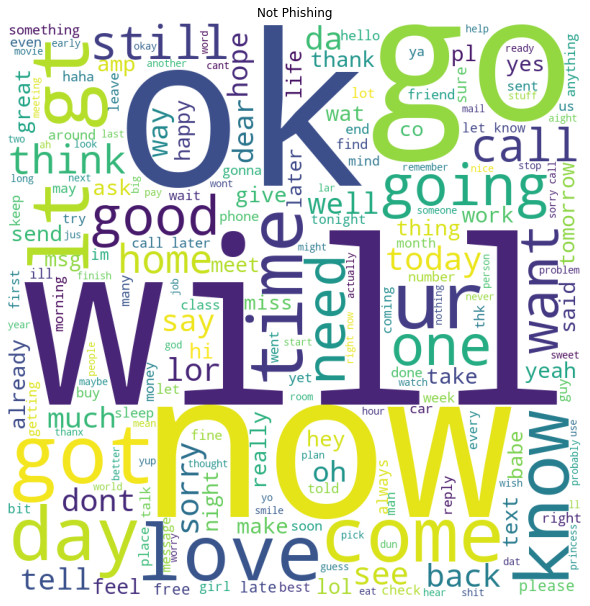

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
comment_words = ''
stopwords = set(STOPWORDS)
for val in df[df['Phishing']==0]['Text ']:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)			
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Not Phishing')
plt.show()

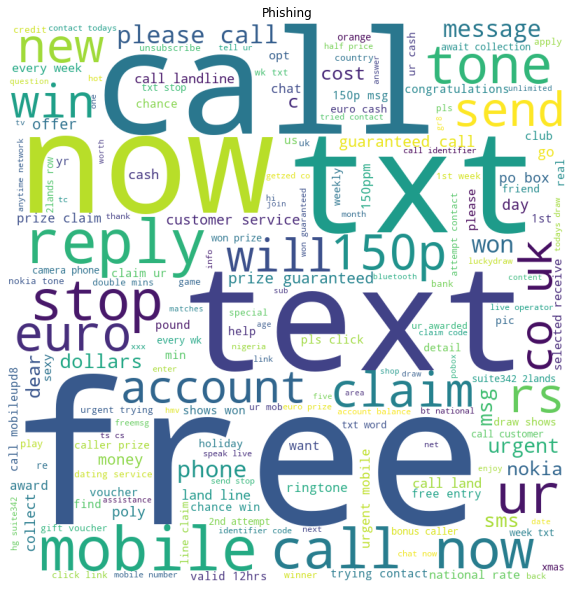

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in df[df['Phishing']==1]['Text ']:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)			
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Phishing')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
df.shape

(4001, 4)

In [ ]:
df.head()

,Unnamed: 0,Sl.No,Text,Phishing
0,0,0,"Go until jurong point, crazy.. Available only ...",0
1,1,1,Ok lar... Joking wif u oni...,0
2,2,2,"Dear user,\nYour account was accessed from a d...",1
3,3,3,U dun say so early hor... U c already then say...,0
4,4,4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer

In [ ]:
import numpy as np
datalist=[]
for i in range(0,df.shape[0]):
  ans=df.loc[i,"Text "]
  bef=df.loc[i,"Phishing"]
  tokens=word_tokenize(ans)
  if np.isnan(bef):
    print(i)
  finaltokens=[]
  for j in tokens:
    k=j.lower()
    finaltokens.append(stemmer.stem(k))
  lst=[]
  for j in finalwords:
    lst.append(finaltokens.count(j))
  datalist.append(lst)


In [ ]:
resultant_df=pd.DataFrame(datalist,columns=words)


In [ ]:
resultant_df['Phishing']=df.Phishing


In [ ]:
cols=resultant_df.columns

In [ ]:
cols

Index(['account', 'accountnumber', 'confirm', 'details', 'mailbox',
       'clickhere', 'payment', 'credit', 'creditdetails', 'bankbalance',
       'password', 'username', 'won', 'recently', 'identity', 'luckydraw',
       'shortlisted', 'credited', 'blocked', 'risk', 'profile', 're-login',
       'congratulations', 'amount', 'loan', 'bankname', 'ifsccode', 'locked',
       'temporarily', 'renewal', 'suspended', 'click', 'urgent', 'confidental',
       'access', 'suspicious', 'activity', 'expired', 'money', 'otp', 'invest',
       'earn', 'more', 'credentials', 'offers', 'card', 'recover', 'selected',
       'paypal', 'easy', 'terms', 'lottery', 'prosperous', 'hurry-up',
       'verify', 'inconvenience', 'complication', 'avoid', 'pay', 'prize',
       'vouchers', 'claim', 'free', 'cash', 'reply', 'congrats', 'awarded',
       'rs', 'text', 'msg', 'stop', 'selected', 'urgent', 'cash', 'call',
       'cash', 'phone', 'noxia', 'motorola', 'sony', 'txt', 'pounds',
       'dollars', 'vodafo

In [ ]:
cols_to_keep=['account', 'accountnumber', 'confirm', 'details', 'mailbox',
       'clickhere', 'payment', 'credit', 'creditdetails', 'bankbalance',
       'password', 'username', 'won', 'recently', 'identity', 'luckydraw',
       'shortlisted', 'credited', 'blocked', 'risk', 'profile', 're-login',
       'congratulations', 'amount', 'loan', 'bankname', 'ifsccode', 'locked',
       'temporarily', 'renewal', 'suspended', 'click', 'urgent', 'confidental',
       'access', 'suspicious', 'activity', 'expired', 'money', 'otp', 'invest',
       'earn', 'more', 'credentials', 'offers', 'card', 'recover', 'selected',
       'paypal', 'easy', 'terms', 'lottery', 'prosperous', 'hurry-up',
       'verify', 'inconvenience', 'complication', 'avoid', 'pay', 'prize',
       'vouchers', 'claim', 'free', 'cash', 'reply', 'congrats', 'awarded',
       'rs', 'text', 'msg', 'stop', 'selected', 'urgent', 'cash', 'call',
       'cash', 'phone', 'noxia', 'motorola', 'sony', 'txt', 'pounds',
       'dollars', 'vodafone', 'transaction', 'euro', 'donate', 'job', 'deal',
       'bonus'] 

In [ ]:
from sklearn.model_selection import train_test_split
X=resultant_df[cols_to_keep]
y=resultant_df.Phishing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
resultant_df.describe()

,account,accountnumber,confirm,details,mailbox,clickhere,payment,credit,creditdetails,bankbalance,...,pounds,dollars,vodafone,transaction,euro,donate,job,deal,bonus,Phishing
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.0,4001.0,...,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,0.015246,0.000500,0.002999,0.006248,0.000750,0.000250,0.001500,0.004749,0.0,0.0,...,0.005999,0.008498,0.001000,0.001750,0.013247,0.000500,0.008998,0.002249,0.004499,0.123469
std,0.177532,0.022355,0.054690,0.078810,0.027376,0.015809,0.044696,0.072301,0.0,0.0,...,0.083451,0.130107,0.031607,0.041796,0.136288,0.022355,0.097052,0.047381,0.066931,0.329016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.0,0.0,...,2.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000


**Trying out different models**



```
# This is formatted as code
```

**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred= classifier.predict(X_test) 

In [ ]:
from sklearn.metrics import confusion_matrix  
cml= confusion_matrix(y_test, y_pred)
cml

array([[1149,    9],
       [  62,  101]])

In [ ]:
accuracy=(cml[0][0]+cml[1][1])/(sum(cml[0])+sum(cml[1]))
print(accuracy)

0.9462528387585163


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1158
           1       0.92      0.62      0.74       163

    accuracy                           0.95      1321
   macro avg       0.93      0.81      0.85      1321
weighted avg       0.95      0.95      0.94      1321



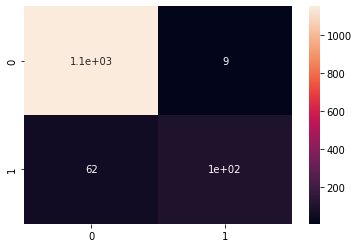

In [ ]:
import seaborn as sns
sns.heatmap(cml, annot=True)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cmd=confusion_matrix(y_test, y_pred)
cmd


array([[1148,   10],
       [  62,  101]])

In [ ]:
accuracy=(cmd[0][0]+cmd[1][1])/(sum(cmd[0])+sum(cmd[1]))
print(accuracy)

0.9454958364875095


In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1158
           1       0.91      0.62      0.74       163

    accuracy                           0.95      1321
   macro avg       0.93      0.81      0.85      1321
weighted avg       0.94      0.95      0.94      1321



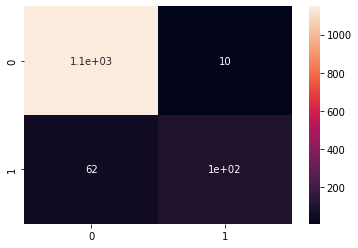

In [ ]:
sns.heatmap(cmd, annot=True)

**K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix  
cmk= confusion_matrix(y_test, y_pred)
cmk

array([[1146,   12],
       [  86,   77]])

In [ ]:
accuracy=(cmk[0][0]+cmk[1][1])/(sum(cmk[0])+sum(cmk[1]))
print(accuracy)

0.9258137774413323


In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1158
           1       0.87      0.47      0.61       163

    accuracy                           0.93      1321
   macro avg       0.90      0.73      0.79      1321
weighted avg       0.92      0.93      0.92      1321



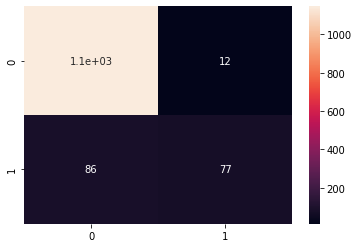

In [ ]:
sns.heatmap(cmk, annot=True)

**SVM**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix  
cms= confusion_matrix(y_test, y_pred)
cms

array([[1148,   10],
       [  58,  105]])

In [ ]:
accuracy=(cms[0][0]+cms[1][1])/(sum(cms[0])+sum(cms[1]))
print(accuracy)

0.9485238455715367


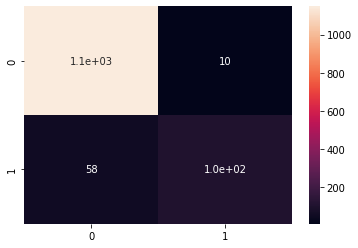

In [ ]:
sns.heatmap(cms, annot=True)

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1158
           1       0.91      0.64      0.76       163

    accuracy                           0.95      1321
   macro avg       0.93      0.82      0.86      1321
weighted avg       0.95      0.95      0.94      1321



**Naïve Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix  
cmn= confusion_matrix(y_test, y_pred)
cmn

array([[1134,   24],
       [  65,   98]])

In [ ]:
accuracy=(cmn[0][0]+cmn[1][1])/(sum(cmn[0])+sum(cmn[1]))
print(accuracy)

0.9326267978803936


In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1158
           1       0.80      0.60      0.69       163

    accuracy                           0.93      1321
   macro avg       0.87      0.79      0.82      1321
weighted avg       0.93      0.93      0.93      1321



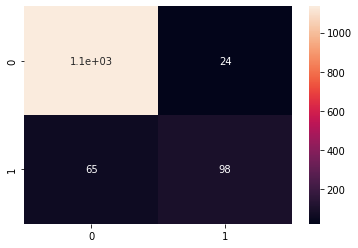

In [ ]:
sns.heatmap(cmn, annot=True)

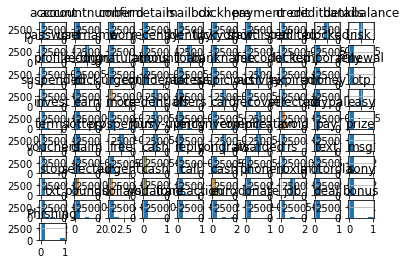

In [ ]:
import matplotlib.pyplot as plt
resultant_df.hist(bins=5)
plt.show()


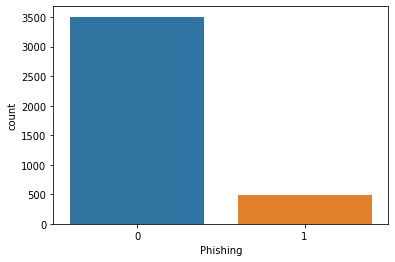

In [ ]:
import seaborn as sns
sns.countplot(x="Phishing",data=df)

**Using cross validation to check whether accuracy can be increased**

**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
score = cross_val_score(LogisticRegression(random_state= 42),X_train,y_train,cv=5, scoring="accuracy")
print (f'Scores for each fold are: {score}')
print (f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.94216418 0.94776119 0.96641791 0.95522388 0.94029851]
Average score: 0.95


**Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
score = cross_val_score(DecisionTreeClassifier(),X_train,y_train,cv=5, scoring="accuracy")
print (f'Scores for each fold are: {score}')
print (f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.95335821 0.94962687 0.95895522 0.96455224 0.94029851]
Average score: 0.95


**SVM**

In [ ]:
from sklearn.svm import SVC
score = cross_val_score( SVC(kernel='linear', random_state=0),X_train,y_train,cv=5, scoring="accuracy")
print (f'Scores for each fold are: {score}')
print (f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.94962687 0.96268657 0.95895522 0.9608209  0.94216418]
Average score: 0.95


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score = cross_val_score(KNeighborsClassifier(n_neighbors=5  , metric='minkowski', p=2 ),
X_train,y_train,cv=5, scoring="accuracy")
print (f'Scores for each fold are: {score}')
print (f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.91604478 0.93470149 0.94402985 0.94776119 0.93656716]
Average score: 0.94


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
score = cross_val_score( MultinomialNB(),X_train,y_train,cv=5, scoring="accuracy")
print (f'Scores for each fold are: {score}')
print (f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.92164179 0.92350746 0.92723881 0.92723881 0.92910448]
Average score: 0.93


**Dimensionality reduction using PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.75)

In [ ]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


In [ ]:
X_train.shape

(2680, 100)

In [ ]:
X_train_pca.shape

(2680, 31)

In [ ]:
X_test_pca.shape

(1321, 31)